In [12]:
import pickle
import re
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\n', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    #text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[-‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

In [1]:
import pandas as pd
import numpy as np

In [2]:
data_df = pd.read_pickle('assets/rescrape/ebird_data.pkl')

In [5]:
data_df.set_index('Common Name',inplace=True)
data_df.head(2)

,Kingdom,Phylum,Class,Order,Family,Binomial Name,Link,Description
Common Name,,,,,,,,
Abbott's Booby,Animalia,Chordata,Aves,Suliformes,Sulidae,Papasula abbotti,https://ebird.org/species/abbboo2,"Gangly, stretched-out-looking black-and-white ..."
Abbott's Starling,Animalia,Chordata,Aves,Passeriformes,Sturnidae,Poeoptera femoralis,https://ebird.org/species/abbsta2,"A small, distinctive starling with a tiny rang..."


In [11]:
data_des = pd.DataFrame(data_df['Description'])
data_des.head(5)
# data.keys()

,Description
Common Name,
Abbott's Booby,"Gangly, stretched-out-looking black-and-white ..."
Abbott's Starling,"A small, distinctive starling with a tiny rang..."
Abdim's Stork,"A medium-sized, dark stork with a white belly...."
Aberdare Cisticola,A large and relatively colorful cisticola ende...
Aberrant Bush Warbler,Small shy warbler. Dull brown with a paler bel...


In [13]:
data_clean = pd.DataFrame(data_des.Description.apply(clean))
data_clean

,Description
Common Name,
Abbott's Booby,gangly stretchedoutlooking blackandwhite seabi...
Abbott's Starling,a small distinctive starling with a tiny range...
Abdim's Stork,a mediumsized dark stork with a white belly th...
Aberdare Cisticola,a large and relatively colorful cisticola ende...
Aberrant Bush Warbler,small shy warbler dull brown with a paler bell...
...,...
Zimmer's Tapaculo,distinctive tapaculo of humid montane forest a...
Zimmer's Woodcreeper,mediumsized slim woodcreeper with a longish ta...
Zino's Petrel,typical gadfly petrel with long angular wings ...


In [14]:
data_des.to_pickle("assets/ebird_desc/description_ebird.pkl")

In [18]:
!pip install -U scikit-learn

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.Description)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

C:\Users\LEGION\anaconda3\envs\indicwiki\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,10,100,1000,10000,10002300,10003000,1000m,1000s,100s,1015,...,zyizya,zzeep,zzhhreeeee,zzwhi,zzzhhh,zzzziiiiiiiii,zzzzz,zzzzzzzzz,zzzzzzzzzt,ʻalalā
Common Name,,,,,,,,,,,,,,,,,,,,,
Abbott's Booby,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Abbott's Starling,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Abdim's Stork,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Aberdare Cisticola,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Aberrant Bush Warbler,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zimmer's Tapaculo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zimmer's Woodcreeper,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zino's Petrel,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
data_dtm.to_pickle("assets/ebird_desc/dtm.pkl")
data_clean.to_pickle('assets/ebird_desc/data_clean.pkl')
pickle.dump(cv, open("assets/ebird_desc/cv.pkl", "wb"))

In [21]:
data = pd.read_pickle('assets/ebird_desc/dtm.pkl')
data = data.transpose()
data.head()

Common Name,Abbott's Booby,Abbott's Starling,Abdim's Stork,Aberdare Cisticola,Aberrant Bush Warbler,Abert's Towhee,Abyssinian Catbird,Abyssinian Crimsonwing,Abyssinian Ground-Hornbill,Abyssinian Ground-Thrush,...,Zebra Finch,Zeledon's Antbird,Zenaida Dove,Zenker's Honeyguide,Zigzag Heron,Zimmer's Tapaculo,Zimmer's Woodcreeper,Zino's Petrel,Zitting Cisticola,Zoe's Imperial-Pigeon
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10002300,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
top_dict = {}
for c in data.columns:
    try:
        top = pd.Series(data[c]).sort_values(ascending=False).head(50)
    # print(top)
    except Exception:
        pass
    top_dict[c]= list(zip(top.index, top.values))
top_dict

{"Abbott's Booby": [('ocean', 1),
  ('gangly', 1),
  ('adjacent', 1),
  ('distinguish', 1),
  ('longnecked', 1),
  ('stretchedoutlooking', 1),
  ('forage', 1),
  ('grayish', 1),
  ('poorly', 1),
  ('forages', 1),
  ('christmas', 1),
  ('seabird', 1),
  ('afield', 1),
  ('pale', 1),
  ('canopy', 1),
  ('pink', 1),
  ('island', 1),
  ('females', 1),
  ('flight', 1),
  ('readily', 1),
  ('rainforest', 1),
  ('range', 1),
  ('species', 1),
  ('rangings', 1),
  ('slenderwinged', 1),
  ('profile', 1),
  ('understood', 1),
  ('strangelooking', 1),
  ('farther', 1),
  ('males', 1),
  ('breeds', 1),
  ('especially', 1),
  ('unique', 1),
  ('extent', 1),
  ('bizarre', 1),
  ('birds', 1),
  ('blackandwhite', 1),
  ('strikingly', 1),
  ('immatures', 1),
  ('slender', 1),
  ('raspberrypink', 0),
  ('rate', 0),
  ('rats', 0),
  ('ratcheting', 0),
  ('raspberryred', 0),
  ('ratchet', 0),
  ('ratchets', 0),
  ('rasping', 0),
  ('raspings', 0),
  ('rasps', 0)],
 "Abbott's Starling": [('breast', 3),
  (

In [31]:
for p, top_words in top_dict.items():
    print(p)
    print(', '.join([word for word, count in top_words[0:5]]))
    print('---')

Abbott's Booby
ocean, gangly, adjacent, distinguish, longnecked
---
Abbott's Starling
breast, brown, starling, small, belly
---
Abdim's Stork
stork, red, white, black, migrant
---
Aberdare Cisticola
rufous, series, streaking, vocalizations, notes
---
Aberrant Bush Warbler
brownishflanked, aberrant, yellowishbellied, warbler, difficult
---
Abert's Towhee
northern, overall, ground, dense, dark
---
Abyssinian Catbird
gray, eye, montane, musical, highlands
---
Abyssinian Crimsonwing
red, forest, small, males, similar
---
Abyssinian Ground-Hornbill
skin, blue, facial, grassland, abyssinian
---
Abyssinian Ground-Thrush
eye, pale, flycatcher, habitats, african
---
Abyssinian Longclaw
black, necklace, note, colorful, partially
---
Abyssinian Owl
eyes, ear, eagleowl, tufts, orange
---
Abyssinian Roller
blue, roller, outer, half, separated
---
Abyssinian Scimitarbill
notes, black, wings, separated, orange
---
Abyssinian Slaty-Flycatcher
eye, pale, flycatcher, habitats, african
---
Abyssinian Whe

In [32]:
from collections import Counter
words = []
for p in data.columns:
    top = [word for (word, count) in top_dict[p]]
    for t in top:
        words.append(t)
        
words

['ocean',
 'gangly',
 'adjacent',
 'distinguish',
 'longnecked',
 'stretchedoutlooking',
 'forage',
 'grayish',
 'poorly',
 'forages',
 'christmas',
 'seabird',
 'afield',
 'pale',
 'canopy',
 'pink',
 'island',
 'females',
 'flight',
 'readily',
 'rainforest',
 'range',
 'species',
 'rangings',
 'slenderwinged',
 'profile',
 'understood',
 'strangelooking',
 'farther',
 'males',
 'breeds',
 'especially',
 'unique',
 'extent',
 'bizarre',
 'birds',
 'blackandwhite',
 'strikingly',
 'immatures',
 'slender',
 'raspberrypink',
 'rate',
 'rats',
 'ratcheting',
 'raspberryred',
 'ratchet',
 'ratchets',
 'rasping',
 'raspings',
 'rasps',
 'breast',
 'brown',
 'starling',
 'small',
 'belly',
 'pale',
 'tinkling',
 'kenya',
 'tiny',
 'sharp',
 'dark',
 'females',
 'pairs',
 'streaks',
 'tanzania',
 'song',
 'sveet',
 'calls',
 'perches',
 'sharpes',
 'forest',
 'perching',
 'local',
 'rapid',
 'yellow',
 'conspicuously',
 'flocks',
 'blueblack',
 'open',
 'canopy',
 'dead',
 'snags',
 'range',

In [33]:
# add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words = []
adj = ['species']
for i in adj : add_stop_words.append(i.lower())

In [34]:
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

data_clean = pd.read_pickle('assets/ebird_desc/data_clean.pkl')

stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.Description)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

import pickle
pickle.dump(cv, open("assets/ebird_desc/cv_stop.pkl", "wb"))
data_stop.to_pickle("assets/ebird_desc/dtm_stop.pkl")

C:\Users\LEGION\anaconda3\envs\indicwiki\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [35]:
!pip install wordcloud
from wordcloud import WordCloud
wc = WordCloud(stopwords=stop_words, background_color="black", colormap="Dark2",
               max_font_size=150, random_state=42)

  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp39-cp39-win_amd64.whl size=161132 sha256=659f6e98c8361765affe69e6342853fc5e6b575f5520233a7c83969b81e0e17d
  Stored in directory: c:\users\legion\appdata\local\pip\cache\wheels\f9\7a\dd\06ef8b5dfe5483f6204133c08eeb16c287cc2c05e290ae2fc0
Successfully built wordcloud


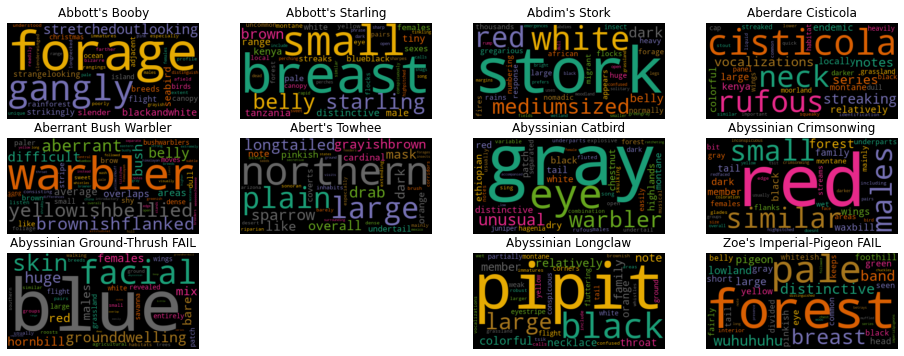

In [39]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

for index, bird in enumerate(data.columns):
    try:
        wc.generate(data_clean.Description[bird])
        
        plt.subplot(3, 4, index+1)
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        plt.title(bird)
    except Exception:
        # plt.subplot(3, 4, index+1)
        # plt.imshow(wc, interpolation="bilinear")
        # plt.axis("off")
        # plt.title(bird+' FAIL')
        pass

    
plt.show()